<a href="https://colab.research.google.com/github/goomy241/tweet-real-time-sentiment-analysis/blob/main/Bonus_3_Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter sentiment analysis

## Reference 

ref: https://python.plainenglish.io/scraping-tweets-with-tweepy-python-59413046e788

ref: https://www.analyticssteps.com/blogs/extracting-pre-processing-youtube-comments

ref: https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e

ref: https://www.analyticssteps.com/blogs/sentiment-analysis-youtube-comments

ref: https://www.tensorflow.org/text/tutorials/classify_text_with_bert

## Setup

In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import json
import pandas as pd
import csv
import string
import os
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/CMPE255/bonus3'

# Tweets Scraping

## Authentication

In [ ]:
consumer_key = 'cWYkgLDxvrqeasBwcjc88iLp1'
consumer_secret = '8ahJTkP2KOXLDs7sppBAsmFz1naycmfJotk5DWXvyEE9XicjhB'
access_token = '851692632598130693-5VlwDLKUsqniecdHGzy8oZ0WHhNrqAl'
access_token_secret = 'vMe8MxngMZ9WVq1R7DeZSEcGM43WQMgqMf7NhhjJq3FHg'

In [ ]:
# attempt authentication
try:
  # create OAuthHandler object
  auth = OAuthHandler(consumer_key, consumer_secret)
  # set access token and secret
  auth.set_access_token(access_token, access_token_secret)
  # create tweepy API object to fetch tweets
  api = tweepy.API(auth)
except:
  print("Error: Authentication Failed")

## Scrape Tweets to csv

In [ ]:
def scrapetweets(search_words, numTweets):
    
    # Define a for-loop to generate tweets at regular intervals
    # We cannot make large API call in one go. Hence, let's try T times
    
    # Define a pandas dataframe to store the date:
    db_tweets = pd.DataFrame(columns = ['username','retweetcount', 'text']
                                )
    program_start = time.time()
    # We will time how long it takes to scrape tweets for each run:
    start_run = time.time()
    
    # Collect tweets using the Cursor object
    # .Cursor() returns an object that you can iterate or loop over to access the data collected.
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweets = tweepy.Cursor(api.search, q=search_words, lang="en", tweet_mode='extended').items(numTweets)
    # Store these tweets into a python list
    tweet_list = [tweet for tweet in tweets]

    noTweets = 0
    for tweet in tweet_list:
# Pull the values
        username = tweet.user.screen_name
        retweetcount = tweet.retweet_count
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:  # Not a Retweet
            text = tweet.full_text
# Add the variables to the empty list - ith_tweet:
        ith_tweet = [username, retweetcount, text]
# Append to dataframe - db_tweets
        db_tweets.loc[len(db_tweets)] = ith_tweet
# increase counter - noTweets  
        noTweets += 1
        
        # Run ended:
    end_run = time.time()
    duration_run = round((end_run-start_run)/60, 2)
    
    print('no. of tweets scraped is {}'.format(noTweets))
    print('time take for it to complete is {} mins'.format(duration_run))
    # Once all runs have completed, save them to a single csv file:

    # Define filename
    filename = path + '/original_tweets_' + search_words + '.csv'
    # Store dataframe in csv with creation date timestamp
    db_tweets.to_csv(filename, index = False)

    program_end = time.time()
    print('Scraping has completed!')
    print('Total time taken to scrape is {} minutes.'.format(round(program_end - program_start)/60, 2))

In [ ]:
# Initialise these variables:
search_words = "mother's day"
numTweets = 1000
# Call the function scrapetweets
scrapetweets(search_words, numTweets)

no. of tweets scraped is 1000
time take for it to complete is 0.5 mins
Scraping has completed!
Total time taken to scrape is 0.5 minutes.


## Data Preprocessing

### Tweet Preprocessing

tweet-preprocessor is a tweet preprocessing library in Python. It deals with URLs, Mentions, Reserved words (RT, FAV), Emojis, Smileys

In [ ]:
original_df = pd.read_csv(path + '/original_tweets_' + search_words + '.csv')

In [ ]:
original_df.head()

,username,retweetcount,text
0,AilsaForshaw,4,Celebrate a special day with a very special gi...
1,Kelvinmwendwa_,1110,It is with a heavy heart that I share my mothe...
2,queenrosario23,18535,happy mother’s day to me as the eldest daughter
3,comadrona,0,Check out this listing I just added to my #Pos...
4,CyberVikingTTV,1192,#FFXIV #FFXIVART Happy Mother's Day 2022💐 http...


In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p
#forming a separate feature for cleaned tweets
for i,v in enumerate(original_df['text']):
    original_df.loc[i,'clean_tweets'] = p.clean(v)

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      1000 non-null   object
 1   retweetcount  1000 non-null   int64 
 2   text          1000 non-null   object
 3   clean_tweets  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


### Remove Duplicate Tweets

ref: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

In [ ]:
original_df.drop_duplicates(subset ="clean_tweets", keep = False, inplace = True)

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 997
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      358 non-null    object
 1   retweetcount  358 non-null    int64 
 2   text          358 non-null    object
 3   clean_tweets  358 non-null    object
dtypes: int64(1), object(3)
memory usage: 14.0+ KB


From the result above we can see that there are a lot of quick retweets, even if we scraped 2500 tweets, there are around 900 non-repeating tweets.

### Export Clean Tweets to csv

In [ ]:
clean_ds = original_df[['username','retweetcount','clean_tweets']].copy()
clean_ds.head()

,username,retweetcount,clean_tweets
0,AilsaForshaw,4,Celebrate a special day with a very special gi...
3,comadrona,0,Check out this listing I just added to my clos...
9,PremiumVibes3,418,There is a mystery in the power and abundance ...
12,carmana0,1152,hilda pays her mom a visit I posted this last ...
13,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...


In [ ]:
clean_filename = path + '/clean_tweets_' + search_words + '.csv'

In [ ]:
clean_ds.to_csv(clean_filename, index = False)

## Data Distribution

In [ ]:
data = pd.read_csv(path + '/combined_wLabel.csv')
data.head()

,username,retweetcount,clean_tweets,label
0,AilsaForshaw,4,Celebrate a special day with a very special gi...,2
1,comadrona,0,Check out this listing I just added to my clos...,1
2,PremiumVibes3,418,There is a mystery in the power and abundance ...,1
3,carmana0,1152,hilda pays her mom a visit I posted this last ...,2
4,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...,1


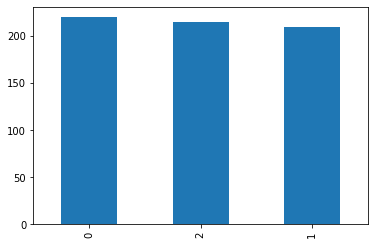

In [ ]:
g = data.label.value_counts().plot.bar()
fig = g.figure

In [ ]:
images_dir = path + "/images"

In [ ]:
fig.savefig(f"{images_dir}/fig1-distribution.svg")

# TextBlob Only

In [ ]:
text_blob = data.copy()
text_blob.head()

,username,retweetcount,clean_tweets,label
0,AilsaForshaw,4,Celebrate a special day with a very special gi...,2
1,comadrona,0,Check out this listing I just added to my clos...,1
2,PremiumVibes3,418,There is a mystery in the power and abundance ...,1
3,carmana0,1152,hilda pays her mom a visit I posted this last ...,2
4,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...,1


## Get Polarity

In [ ]:
text_blob['polarity'] = text_blob['clean_tweets'].apply(lambda x : TextBlob(x).sentiment.polarity)
text_blob.head()

,username,retweetcount,clean_tweets,label,polarity
0,AilsaForshaw,4,Celebrate a special day with a very special gi...,2,0.413318
1,comadrona,0,Check out this listing I just added to my clos...,1,0.000000
2,PremiumVibes3,418,There is a mystery in the power and abundance ...,1,0.000000
3,carmana0,1152,hilda pays her mom a visit I posted this last ...,2,0.400000
4,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...,1,0.000000


Create a new column for polarity categories 

In [ ]:
text_blob['pol_cat']  = 0
text_blob.head()

,username,retweetcount,clean_tweets,label,polarity,pol_cat
0,AilsaForshaw,4,Celebrate a special day with a very special gi...,2,0.413318,0
1,comadrona,0,Check out this listing I just added to my clos...,1,0.000000,0
2,PremiumVibes3,418,There is a mystery in the power and abundance ...,1,0.000000,0
3,carmana0,1152,hilda pays her mom a visit I posted this last ...,2,0.400000,0
4,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...,1,0.000000,0


In [ ]:
text_blob['pol_cat'][text_blob.polarity == 0] = 1 # neutral 
text_blob['pol_cat'][text_blob.polarity > 0] = 2 # positive 
text_blob['pol_cat'][text_blob.polarity < 0] = 0 # negative 
text_blob.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,username,retweetcount,clean_tweets,label,polarity,pol_cat
0,AilsaForshaw,4,Celebrate a special day with a very special gi...,2,0.413318,2
1,comadrona,0,Check out this listing I just added to my clos...,1,0.000000,1
2,PremiumVibes3,418,There is a mystery in the power and abundance ...,1,0.000000,1
3,carmana0,1152,hilda pays her mom a visit I posted this last ...,2,0.400000,2
4,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...,1,0.000000,1


## Evaluate Accuracy 

In [ ]:
from sklearn import metrics
print(metrics.classification_report(text_blob['label'], text_blob['pol_cat']))

              precision    recall  f1-score   support

           0       0.69      0.30      0.42       220
           1       0.52      0.40      0.46       210
           2       0.50      0.89      0.64       215

    accuracy                           0.53       645
   macro avg       0.57      0.53      0.50       645
weighted avg       0.57      0.53      0.50       645



# Logistics Regression Model

## Convert to Lowercase

In [ ]:
# change upper case to lower case
data['clean_tweets'] = data['clean_tweets'].str.lower()

## Remove Stop Words

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
data['clean_tweets'] = data['clean_tweets'].str.strip()

In [ ]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [ ]:
data['tweets_woStop'] = data['clean_tweets'].apply(lambda x : remove_stopwords(x))
data.head()

,username,retweetcount,clean_tweets,label,tweets_woStop
0,AilsaForshaw,4,celebrate a special day with a very special gi...,2,celebrate special day special gift ! see 's la...
1,comadrona,0,check out this listing i just added to my clos...,1,check listing added closet : guiseppe armani m...
2,PremiumVibes3,418,there is a mystery in the power and abundance ...,1,mystery power abundance mothers . celebrate th...
3,carmana0,1152,hilda pays her mom a visit i posted this last ...,2,hilda pays mom visit posted last year version ...
4,Adwoa_Sparkles,176,. with offset and kulture celebrating mothers ...,1,. offset kulture celebrating mothers day last ...


## Get Training and Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['tweets_woStop'],data['label'],test_size = 0.2,random_state = 324)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(516,)
(129,)


### Export to csv

ref: https://sparkbyexamples.com/pandas/pandas-combine-two-series-into-dataframe/#:~:text=Combine%20Two%20Series%20Using%20pandas.&text=merge()%20can%20be%20used,True%2C%20left_index%3DTrue)%20.

In [ ]:
train_combined = pd.DataFrame(X_train).join(y_train)
train_combined.head()

,tweets_woStop,label
347,saying k probably checked allocation long time...,1
233,tell ur mom said happy mothers day,2
270,mothers love fuel need lifes journey . mothers...,1
175,throwback video called parents tell got two iv...,1
486,"west point graduate , esperanto said trump wan...",0


In [ ]:
train_filename = path + '/train_tweets.csv'

In [ ]:
train_combined.to_csv(train_filename, index = False)

In [ ]:
test_combined = pd.DataFrame(X_test).join(y_test)
test_combined.head()

,tweets_woStop,label
638,mark meadows texts expose fox news helped dona...,1
536,obama largest turnout history inaugurated . go...,1
100,happy mother 's day everyone,2
244,mothers day peaceful ! fathers day shit show !,1
55,happy late mother 's day everyone,1


In [ ]:
test_filename = path + '/test_tweets.csv'

In [ ]:
test_combined.to_csv(test_filename, index = False)

### Create Folders with labels

ref: https://stackoverflow.com/questions/60706752/how-to-make-directory-on-the-google-colab

In [ ]:
# Create a folder in google Colab
import os.path
import os
if os.path.exists(path + '/data') == False:
    os.mkdir(path + '/data') 

In [ ]:
# Define function to create a folder with given path\
import os.path
import os
def create_folder(s_path, folder_name):
  """ s_path is a string
      folder_name is either train or test: str
  """
  temp = s_path + '/data/' +folder_name
  if os.path.exists(temp) == False:
    os.mkdir(temp) 

In [ ]:
create_folder(path, 'train')

In [ ]:
# Define function to create a folder for each label
def create_label_folder(path, purpose, labels):
  """ path is str
      purpose is either train or test: str
      labels contains a unique label: set(int)
  """
  for num in labels:
    temp_path = path + "/data/" + purpose +"/" + str(num)
    if os.path.exists(temp_path) == False:
      os.mkdir(temp_path)


In [ ]:
# Create folders for each label
labels = set(y_train.to_numpy())
create_label_folder(path, 'train', labels)

In [ ]:
# Convert y_train and X_train to numpy
np_y_train = y_train.to_numpy()
np_X_train = X_train.to_numpy()
np_y_test = y_test.to_numpy()
np_X_test = X_test.to_numpy()

In [ ]:
# Create txt files according to a label
train_path = path + '/data/train'
os.chdir(train_path)
for i in range(len(np_X_train)):
  file_path = train_path +'/' + str(np_y_train[i]) + '/'
  file_name = str(i)+'_train.txt'
  temp_file = open(file_path+file_name, 'w')
  temp_file.writelines(np_X_train[i])
  temp_file.close()


In [ ]:
# Create a test folder
create_folder(path, 'test')
# Create folders for each label in test folder
create_label_folder(path, 'test', labels)

In [ ]:
# Create txt files according to a label
test_path = path + '/data/test'
os.chdir(test_path)
for i in range(len(np_X_test)):
  file_path = test_path +'/' + str(np_y_test[i]) + '/'
  file_name = str(i)+'_test.txt'
  temp_file = open(file_path+file_name, 'w')
  temp_file.writelines(np_X_test[i])
  temp_file.close()

## Build the Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [ ]:
vocab = vect.vocabulary_

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

## Evaluate the Model

### Get R2 Score.

In [ ]:
print('Training score: ' + str(lr.score(tf_train,y_train)))
print('Testing score: ' + str(lr.score(tf_test,y_test)))

Training score: 0.9922480620155039
Testing score: 0.6434108527131783


### Predict the test dataset

In [ ]:
expected = y_test
predicted = lr.predict(tf_test)

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        38
           1       0.55      0.60      0.57        47
           2       0.85      0.75      0.80        44

    accuracy                           0.64       129
   macro avg       0.65      0.64      0.65       129
weighted avg       0.65      0.64      0.65       129



In [ ]:
print(metrics.confusion_matrix(expected,predicted))

[[22 16  0]
 [13 28  6]
 [ 4  7 33]]


### Get F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.6460126219162364

# Transfer Learning with Bert

## Setup

In [18]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 5.6 MB/s 
     |████████████████████████████████| 462 kB 52.5 MB/s 


In [19]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 47.8 MB 1.6 MB/s 
     |████████████████████████████████| 99 kB 5.4 MB/s 
     |████████████████████████████████| 352 kB 44.6 MB/s 
     |████████████████████████████████| 90 kB 6.3 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 42.9 MB/s 
     |████████████████████████████████| 237 kB 44.0 MB/s 
     |████████████████████████████████| 1.1 MB 52.1 MB/s 


In [20]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

## Load Data

In [ ]:
data_path = path + "/data/"

In [ ]:
os.chdir(data_path)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 516 files belonging to 3 classes.
Using 413 files for training.
Found 516 files belonging to 3 classes.
Using 103 files for validation.
Found 129 files belonging to 3 classes.


In [ ]:
# Have a peek of several comments and their labels
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Comments: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')

Comments: b'k ? dont k im disabled live fixed income poverty . trump thinks disabled people .'
Label : 0 (0)
Comments: b'want truth ? scotus leaker trump supporter would prison already .'
Label : 0 (0)
Comments: b"anime : dororohappy mother 's day !"
Label : 2 (2)


## Load Model from TensorFlow Hub

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Preprocessing Model

In [ ]:
# Load preprocessing model
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

Have a peek of output of the preprocessing model

In [ ]:
text_test = ['Thank you for being a wonderful mother and role model to our daughters and to so many others around the world.']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 4067 2017 2005 2108 1037 6919 2388 1998 2535 2944 2000]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


## Test BERT Model

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[-0.31760135  0.99018     0.06187095  0.4685784  -0.10798614  0.6255345
  0.9788018  -0.9561133   0.00294952 -0.99750733  0.02566279 -0.99855024]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[ 0.80339265 -0.12181975 -0.16138603 ... -0.38363156  0.25849637
   1.3598689 ]
 [ 0.6814394   0.10791375 -0.16135325 ... -0.14763236  0.7092936
   1.5934958 ]
 [-0.05646053  1.283159   -0.37245512 ...  0.15214351 -0.43238097
   0.8290049 ]
 ...
 [-0.39325684 -1.10022    -0.97442997 ...  0.02454329  1.1957443
   1.7634048 ]
 [-1.0204506  -0.48544914 -1.552165   ... -0.6106756  -0.8393978
   1.2645757 ]
 [-0.82679486  0.7526918  -0.82222193 ... -0.76940936 -0.85258305
   1.3870568 ]]


## Define Classifier

In [ ]:
encoder = hub.KerasLayer(tfhub_handle_encoder, name='BERT_encoder')

In [ ]:
encoder.trainable=True

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  # net = tf.keras.layers.Dense(64, activation='ReLU', name='head3')(net)
  # net = tf.keras.layers.Dense(32, activation='ReLU', name='head4')(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

Have a peek of result of untrained model

In [ ]:
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.58903164 0.6121935  0.5457453 ]], shape=(1, 3), dtype=float32)


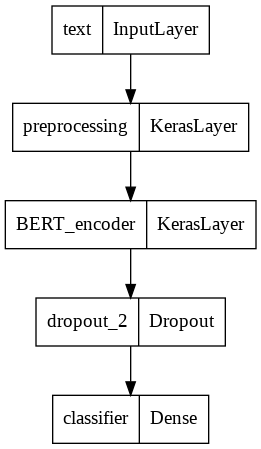

In [ ]:
# check model structure
tf.keras.utils.plot_model(classifier_model)

In [ ]:
classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

## Define Loss function

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

## Define Optimizer

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

## Compile the Model

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=['accuracy'])

## Train the Model

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
13/13 [==============================] - 10s 276ms/step - loss: 1.2258 - accuracy: 0.3584 - val_loss: 0.9591 - val_accuracy: 0.5825
Epoch 2/10
13/13 [==============================] - 3s 228ms/step - loss: 0.8384 - accuracy: 0.6199 - val_loss: 0.7899 - val_accuracy: 0.6505
Epoch 3/10
13/13 [==============================] - 3s 231ms/step - loss: 0.6702 - accuracy: 0.7240 - val_loss: 0.7942 - val_accuracy: 0.6214
Epoch 4/10
13/13 [==============================] - 3s 229ms/step - loss: 0.5705 - accuracy: 0.7845 - val_loss: 0.7591 - val_accuracy: 0.6019
Epoch 5/10
13/13 [==============================] - 3s 229ms/step - loss: 0.4542 - accuracy: 0.8354 - val_loss: 0.7646 - val_accuracy: 0.6408
Epoch 6/10
13/13 [==============================] - 3s 229ms/step - loss: 0.4164 - accuracy: 0.8450 - val_loss: 0.7688 - val_accuracy: 0.6505
Epoch 7/10
13/13 [==============================] - 3s 

Plot the accuracy and loss over time

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


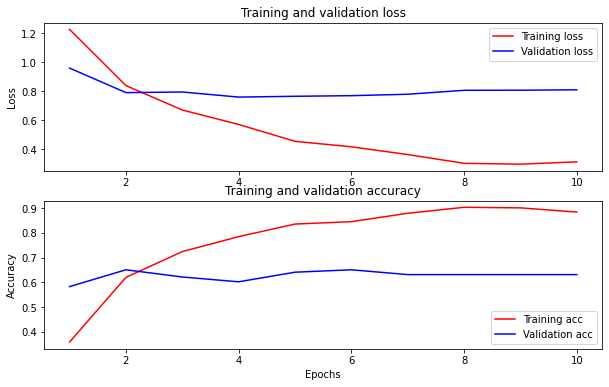

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
fig.savefig(f"{images_dir}/fig2-learning curve02-epoch10.svg")

## Evaluate the Model

In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

5/5 [==============================] - 17s 109ms/step - loss: 0.7763 - accuracy: 0.7209
Loss: 0.7763172388076782
Accuracy: 0.7209302186965942


test with the same text before training

In [ ]:
bert_train_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_train_result))

tf.Tensor([[0.5086044 0.508258  0.7175911]], shape=(1, 3), dtype=float32)


## Export the Model

In [ ]:
dataset_name = 'tweets_sentiment'
saved_model_path = path + '/{}_bert_epoch10'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [ ]:
saved_path = path + "/" + dataset_name + "_model"
classifier_model.save(saved_path, save_format="h5")

# Use Pre-trained Model

ref: https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment?text=Leftists+lose+it+over+Joe+Manchin+thwarting+Dem+abortion+bill

## Load Model

In [5]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 6.6 MB 46.5 MB/s 
     |████████████████████████████████| 880 kB 33.7 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 596 kB 61.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=93572fdf8b6c59a60b625a5ec953232d7902f6876421d86773fdd92db6180ab3
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [7]:
!git lfs install
!git clone https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into 'bert-base-multilingual-uncased-sentiment'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.
Filtering content: 100% (3/3), 1.87 GiB | 38.63 MiB/s, done.


check the tokenizer and model</br>
ref: https://metatext.io/models/nlptown-bert-base-multilingual-uncased-sentiment

In [8]:
text_test = ['Thank you for being a wonderful mother and role model to our daughters and to so many others around the world.']

In [11]:
encode = tokenizer(text_test, return_tensors="pt")
encode

{'input_ids': tensor([[  101, 67715, 10855, 10139, 11352,   143, 49108, 13907, 10110, 11892,
         10713, 10114, 14008, 34479, 10110, 10114, 10297, 11260, 14399, 12096,
         10103, 10228,   119,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

for this pre-train model, it's going to predict the sentiment as a number of stars (between 1 and 5), so the output will have 5 classes

In [15]:
res = model(**encode)
res

SequenceClassifierOutput([('logits',
                           tensor([[-2.5006, -2.8346, -0.9790,  1.6211,  3.7379]],
                                  grad_fn=<AddmmBackward0>))])

In [29]:
logits = res.logits.detach().numpy()
logits

array([[-2.5005515, -2.834644 , -0.9789833,  1.6210691,  3.7378666]],
      dtype=float32)

In [33]:
prediction = tf.nn.softmax(logits)
prediction

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.00172413, 0.00123446, 0.00789549, 0.10630834, 0.8828376 ]],
      dtype=float32)>

In [46]:
int(tf.argmax(input=logits, axis=1)) + 1

5

## Load Data

In [34]:
data_path = path + "/data/"

In [35]:
os.chdir(data_path)

For this pre-trained model, we only apply our data to predict, so we don't need to split train and test dataset.

In [38]:
clean_df = pd.read_csv(path + '/combined_wLabel.csv')
clean_df.head()

,username,retweetcount,clean_tweets,label
0,AilsaForshaw,4,Celebrate a special day with a very special gi...,2
1,comadrona,0,Check out this listing I just added to my clos...,1
2,PremiumVibes3,418,There is a mystery in the power and abundance ...,1
3,carmana0,1152,hilda pays her mom a visit I posted this last ...,2
4,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...,1


## Make prediction

In [55]:
def predict_label (row):
  temp_comment = row['clean_tweets']
  tokens = tokenizer.encode(temp_comment, return_tensors='pt')
  result = model(tokens)
  score = int(tf.argmax(result.logits.detach().numpy(), axis=1))+1
  if score <= 2:
    return 0
  elif score <= 4:
    return 1
  else:
    return 2

In [56]:
clean_df['predict_label'] = clean_df.apply (lambda row: predict_label(row), axis=1)
clean_df.head()

,username,retweetcount,clean_tweets,label,predict_label
0,AilsaForshaw,4,Celebrate a special day with a very special gi...,2,2
1,comadrona,0,Check out this listing I just added to my clos...,1,2
2,PremiumVibes3,418,There is a mystery in the power and abundance ...,1,2
3,carmana0,1152,hilda pays her mom a visit I posted this last ...,2,1
4,Adwoa_Sparkles,176,. with Offset and Kulture celebrating Mothers ...,1,2


## Evaluate the Accuracy

In [57]:
print(metrics.classification_report(clean_df['label'], clean_df['predict_label']))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       220
           1       0.56      0.23      0.33       210
           2       0.61      0.85      0.71       215

    accuracy                           0.64       645
   macro avg       0.62      0.63      0.60       645
weighted avg       0.62      0.64      0.60       645

